# Get and explore dataset

In [24]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sn
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
import re
from keras.preprocessing.sequence import pad_sequences

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

Max Review Size: 49 characters.
Min Review Size: 2 characters.
Mean Review Size: 25 characters.
25th Review Size Percentile: 16 characters.
75th Review Size Percentile: 33 characters.
Review Size Standard Deviation: 11.28 characters.


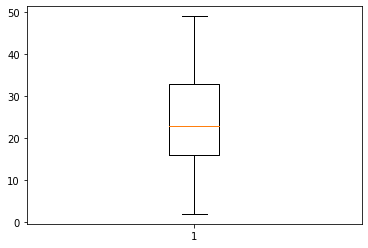

There are 7776 words in the data set.
There are 1793 reviews in the dataset with 872 positive and 921 negative reviews.
This give us 48.6% Positive and 51.4% Negative Reviews.

There are 1490 unique word in the positive reviews. Here is the Top 10
[('a', 173), ('the', 157), ('book', 108), ('of', 95), ('and', 82), ('great', 63), ('to', 62), ('for', 59), ('read', 49), ('good', 44)]

There are 1517 unique word in the negative reviews. Here is the Top 10:
[('the', 133), ('a', 129), ('not', 93), ('of', 82), ('and', 80), ('book', 78), ('for', 64), ('this', 62), ('is', 48), ('to', 47)]


In [7]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
review_size_list = [len(review) for review in data]
print(f"Max Review Size: {np.amax(review_size_list)} characters.")
print(f"Min Review Size: {np.amin(review_size_list)} characters.")
print(f"Mean Review Size: {sum(review_size_list) / len(data):.0f} characters.")
print(f"25th Review Size Percentile: {np.percentile(review_size_list,25):.0f} characters.")
print(f"75th Review Size Percentile: {np.percentile(review_size_list,75):.0f} characters.")
print(f"Review Size Standard Deviation: {np.std(review_size_list):.2f} characters.")
plt.boxplot(review_size_list)
plt.show()

# - Calculate the number of words in the dataset
word_count = 0
for review in data:
  word_count += len(re.findall(r'\w+', review))
print(f"There are {word_count} words in the data set.")

# - Perform any other dataset investigation that you feel would be valuable
print(f"There are {len(data)} reviews in the dataset with {len(positive)} positive and {len(negative)} negative reviews.")
print(f"This give us {(len(positive) / len(data)) * 100:.1f}% Positive and {(len(negative) / len(data)) * 100:.1f}% Negative Reviews.")



# Count the occurence of each unique word in Positive reviews
positive_word_dict = {}
for review in positive:
  wordlist = review.split()
  for word in wordlist:
    if word in positive_word_dict:
      positive_word_dict[word] += 1
    else:
      positive_word_dict[word] = 1

# Count the occurance of each unique word in Negative Reviews
negative_word_dict = {}
for review in negative:
  wordlist = review.split()
  for word in wordlist:
    if word in negative_word_dict:
      negative_word_dict[word] += 1
    else:
      negative_word_dict[word] = 1

print(f"\nThere are {len(positive_word_dict)} unique word in the positive reviews. Here is the Top 10")
print(sorted(positive_word_dict.items(), key=lambda x: x[1], reverse=True)[0:10])
print(f"\nThere are {len(negative_word_dict)} unique word in the negative reviews. Here is the Top 10:")
print(sorted(negative_word_dict.items(), key=lambda x: x[1], reverse=True)[0:10])

In [9]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [12]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
# Count Words per Review and calculate mean and max

# See Note below 

words_per_review = [len(review.split()) for review in data]
print(f"Average words per review: {sum(words_per_review) / len(data):.2f}")
print(f"Maximum words per review: {np.amax(words_per_review):.0f}")

tokens_per_review = [len(review) for review in tokenized_data]
print(f"Average tokens per review: {sum(tokens_per_review) / len(tokenized_data):.2f}")
print(f"Maximum tokens per review: {np.amax(tokens_per_review):.0f}")
print("\nNumber of occurences of each number of tokens per review:")
print(np.unique(tokens_per_review, return_counts=True))

maxlen = 5

processed_data = pad_sequences(tokenized_data, maxlen=maxlen, dtype='int32', padding='post', truncating='post', value=0)

Average words per review: 4.34
Maximum words per review: 12
Average tokens per review: 1.32
Maximum tokens per review: 7

Number of occurences of each number of tokens per review:
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([545, 581, 360, 203,  64,  32,   7,   1], dtype=int64))


In [13]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_data, labels, test_size=0.2, shuffle=True)

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):      
    y_pred = model.predict(X_test)
    # Convert to classes
    y_pred_class = to_class(y_pred)
    y_test_class = to_class(y_test)
    #Display Metrics
    print(f"F1 Score        : {f1_score(y_test_class, y_pred_class):.3f}")
    print(f"Precision Score : {precision_score(y_test_class, y_pred_class):.3f}")
    print(f"Recall Score    : {recall_score(y_test_class, y_pred_class):.3f}")
    print("\n\nConfusion Matrix\n\n")
    # Calculate Confusion Matrix    
    cm = confusion_matrix(y_test_class, y_pred_class)
    #Plot Confusion matrix using seaborn
    sn.set(font_scale=2)
    sn.heatmap(cm, 
               annot=True, 
               annot_kws={"size": 15}, 
               xticklabels=["True False","True Positive"], 
               yticklabels=["Predicted False","Predicted Positive"], 
               square=True,
               cmap="Blues")
    plt.show()

# Build and tune model

Define network architecture

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def define_model(od=32):
  model = keras.Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, output_dim=od))
  model.add(layers.SpatialDropout1D(rate=0.2))
  model.add(layers.BatchNormalization())
  model.add(layers.LSTM(units=32))
  model.add(layers.Dense(units=2, activation='softmax'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()
  return model



Train model

In [16]:
# Define parameter to use
epoch = 5
out_dim_list = [10,25,32,50,100]

def train_model():
  model.fit(X_train, y_train, epochs=epoch, batch_size=10)



In [17]:
# Only run once before training and tuning model
cvscores = []

In [18]:
def store_metrics(output_dim):
  # Run after every model train to add results and compare afterwards
  scores = model.evaluate(X_test, y_test, verbose=0)
  cvscores.append([output_dim, epoch, scores[1], scores[0]])

In [19]:
for outdim in out_dim_list:
  model = define_model(outdim)
  train_model()
  store_metrics(outdim)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          25600     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 10)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, None, 10)          40        
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5504      
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 31,210
Trainable params: 31,190
Non-train

Train on 1434 samples
Epoch 1/5
1434/1434 [==============================] - 2s 1ms/sample - loss: 0.6837 - acc: 0.5607
Epoch 2/5
1434/1434 [==============================] - 1s 684us/sample - loss: 0.6615 - acc: 0.5983
Epoch 3/5
1434/1434 [==============================] - 1s 695us/sample - loss: 0.6500 - acc: 0.6290
Epoch 4/5
1434/1434 [==============================] - 1s 723us/sample - loss: 0.6450 - acc: 0.6046
Epoch 5/5
1434/1434 [==============================] - 1s 702us/sample - loss: 0.6342 - acc: 0.6123


Examine performance of model

In [22]:
print("Epochs | Accuracy | Loss  | OP_Dim\n----------------------------------")
for i in range(len(cvscores)):
    print(f" {cvscores[i][1]:4}  |{cvscores[i][2] * 100:7.2f}%  |{cvscores[i][3]:7.4f}|{cvscores[i][0]:5}")

Epochs | Accuracy | Loss  | OP_Dim
----------------------------------
    5  |  59.05%  | 0.6545|   10
    5  |  59.89%  | 0.6600|   25
    5  |  57.10%  | 0.6645|   32
    5  |  60.45%  | 0.6592|   50
    5  |  61.00%  | 0.6588|  100


F1 Score        : 0.626
Precision Score : 0.613
Recall Score    : 0.639


Confusion Matrix




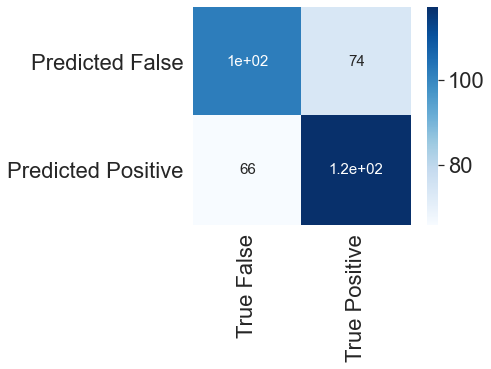

In [25]:
assess_model(model, X_test, y_test)

Plot graphs for accuracy and loss

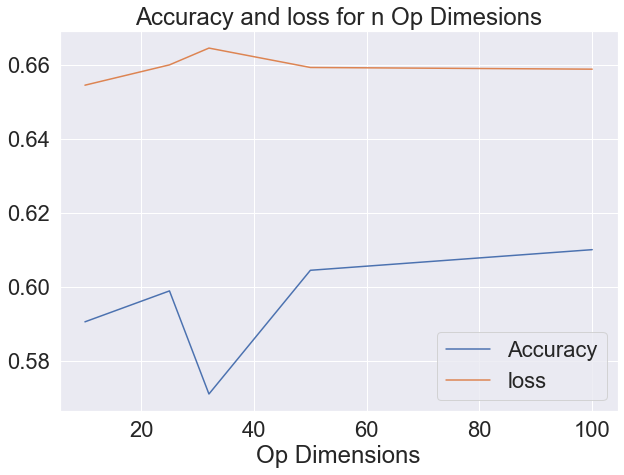

In [26]:
eps, acc, loss = [], [], []
for i in range(len(cvscores)):
  eps.append(cvscores[i][0])
  acc.append(cvscores[i][2])
  loss.append(cvscores[i][3])
plt.figure(figsize=(10,7))
plt.plot(eps, acc, label="Accuracy")
plt.plot(eps, loss, label="loss")
plt.xlabel('Op Dimensions')
plt.title('Accuracy and loss for n Op Dimesions')
plt.legend()
plt.show()

# Make a prediction

In [27]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

y_pred = model.predict(padded)




In [28]:
print(prediction_data, to_word_label(y_pred))

['this book is fabulous', 'i hated this book', 'the best', 'no good', 'okay'] ['negative', 'negative', 'positive', 'positive', 'negative']
